## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
#為了解決 model.fit 當掉問題
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
from keras.layers import BatchNormalization
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
STOP = [10,25]

In [29]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

def earlystopCB(monitor_item='val_loss', num_stop=5, isverbose=1):
    earlystop = EarlyStopping(monitor=monitor_item, 
                              patience=num_stop, 
                              verbose=isverbose
                              )
    return earlystop

In [30]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for stop in STOP:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    earlystop = earlystopCB(monitor_item='val_acc', num_stop=stop)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "acc-stop:%s" % (stop)
    results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
__________

/Volumes/Data/Anaconda/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.341339). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 16s 328us/step - loss: 1.5420 - acc: 0.4594 - val_loss: 1.6070 - val_acc: 0.4333
Epoch 7/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.5105 - acc: 0.4692 - val_loss: 1.5843 - val_acc: 0.4406
Epoch 8/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.4813 - acc: 0.4801 - val_loss: 1.5724 - val_acc: 0.4446
Epoch 9/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.4531 - acc: 0.4909 - val_loss: 1.5591 - val_acc: 0.4512
Epoch 10/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.4293 - acc: 0.4989 - val_loss: 1.5355 - val_acc: 0.4594
Epoch 11/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.4074 - acc: 0.5052 - val_loss: 1.5331 - val_acc: 0.4579
Epoch 12/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.3845 - acc: 0.5153 - val_loss: 1.5151 - val_acc: 0.4664
Epoch 13/50
50000/50000 [==========

50000/50000 [==============================] - 19s 383us/step - loss: 1.4702 - acc: 0.4866 - val_loss: 1.5857 - val_acc: 0.4416
Epoch 10/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.4465 - acc: 0.4951 - val_loss: 1.5752 - val_acc: 0.4456
Epoch 11/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.4232 - acc: 0.5054 - val_loss: 1.5543 - val_acc: 0.4518
Epoch 12/50
50000/50000 [==============================] - 33s 660us/step - loss: 1.4018 - acc: 0.5099 - val_loss: 1.5479 - val_acc: 0.4562
Epoch 13/50
50000/50000 [==============================] - 33s 652us/step - loss: 1.3816 - acc: 0.5185 - val_loss: 1.5331 - val_acc: 0.4584
Epoch 14/50
50000/50000 [==============================] - 26s 520us/step - loss: 1.3623 - acc: 0.5259 - val_loss: 1.5202 - val_acc: 0.4633
Epoch 15/50
50000/50000 [==============================] - 27s 534us/step - loss: 1.3420 - acc: 0.5321 - val_loss: 1.5139 - val_acc: 0.4671
Epoch 16/50
50000/50000 [=======

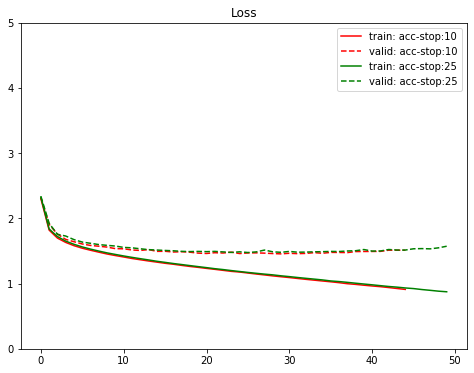

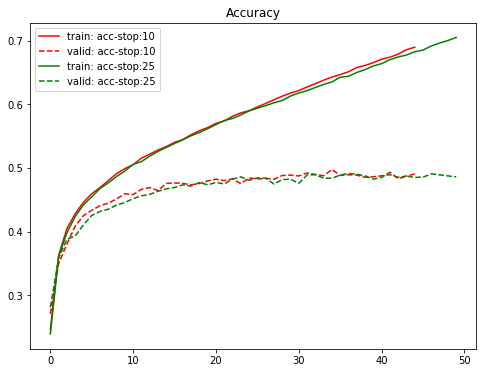

In [31]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()